In [2]:
# import der Bibliotheken
from arcgis.learn import MaskRCNN, prepare_data
import torch
from fastai.vision.transform import rotate, brightness, contrast, flip_lr

In [6]:
# Check GPU
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
0
1
Tesla K80


In [2]:
# Pfad zum Modell
model_path = r'C:\Users\bemu\Desktop\Webinar\Demo_Notebook\models\retrained_model_onbasel\retrainedmodel_20e\retrainedmodel_20e.emd'
# Pfad zu den Trainingsdaten
data_path = r'C:\Users\bemu\Desktop\Webinar\Demo_Notebook\daten\training_data'

In [3]:
# Data Augmentation um die Menge an Trainingsdaten zu erhöhen und Varianz in die Daten zu bringen

# Transformationen für das Training --> siehe fastai vision transfroms
train_tfms = [
    brightness(change=(0.4, 0.6)),
    contrast(scale=(0.75, 1.5)),
    rotate(degrees=10, p=0.3),
    flip_lr()
]
# Transformationen für das Validationsdataset
val_tfms = []

# Transformationen werden an die Funktion als Tuple übergeben
trfrms = (train_tfms, val_tfms)

In [4]:
# Vorbereitung der Daten für das Training
data = prepare_data(path = data_path, batch_size = 8, transforms = trfrms)

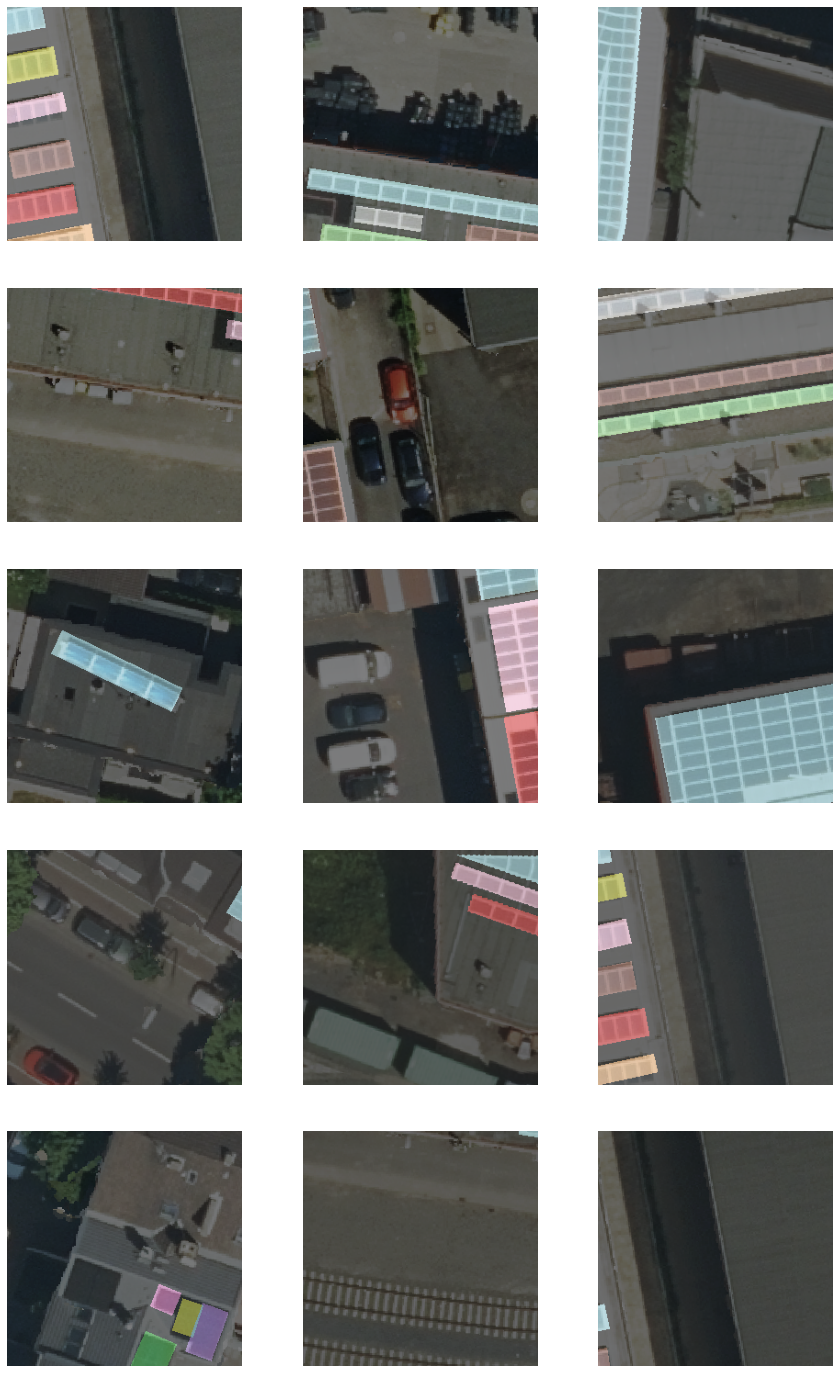

In [5]:
# Die gelabelten ImageChips anzeigen um visuell zu kontrollieren
data.show_batch(5)

In [6]:
# Initialisierung des gewünschten Modells
model = MaskRCNN(data, pretrained_path = model_path)

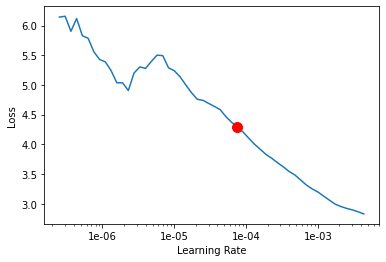

In [7]:
# Bestimmung der learning rate
my_lr = model.lr_find()

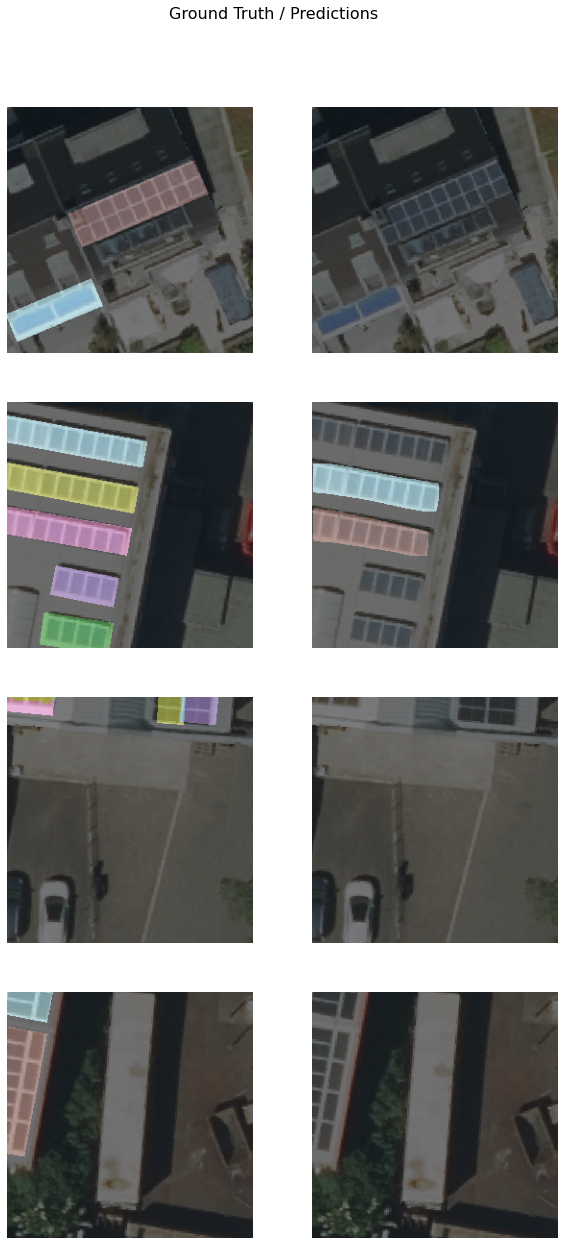

In [8]:
# Check die Performance des Modells vor dem Training auf unbekannten Daten
model.show_results()

In [9]:
# Trainieren des Modells
model.fit(epochs = 5, lr = my_lr, early_stopping = False)

epoch,train_loss,valid_loss,time
0,2.446686,0.903004,06:27
1,1.229658,0.749062,06:15
2,0.871166,0.710936,06:23
3,0.708779,0.701678,06:26
4,0.638318,0.707983,06:25


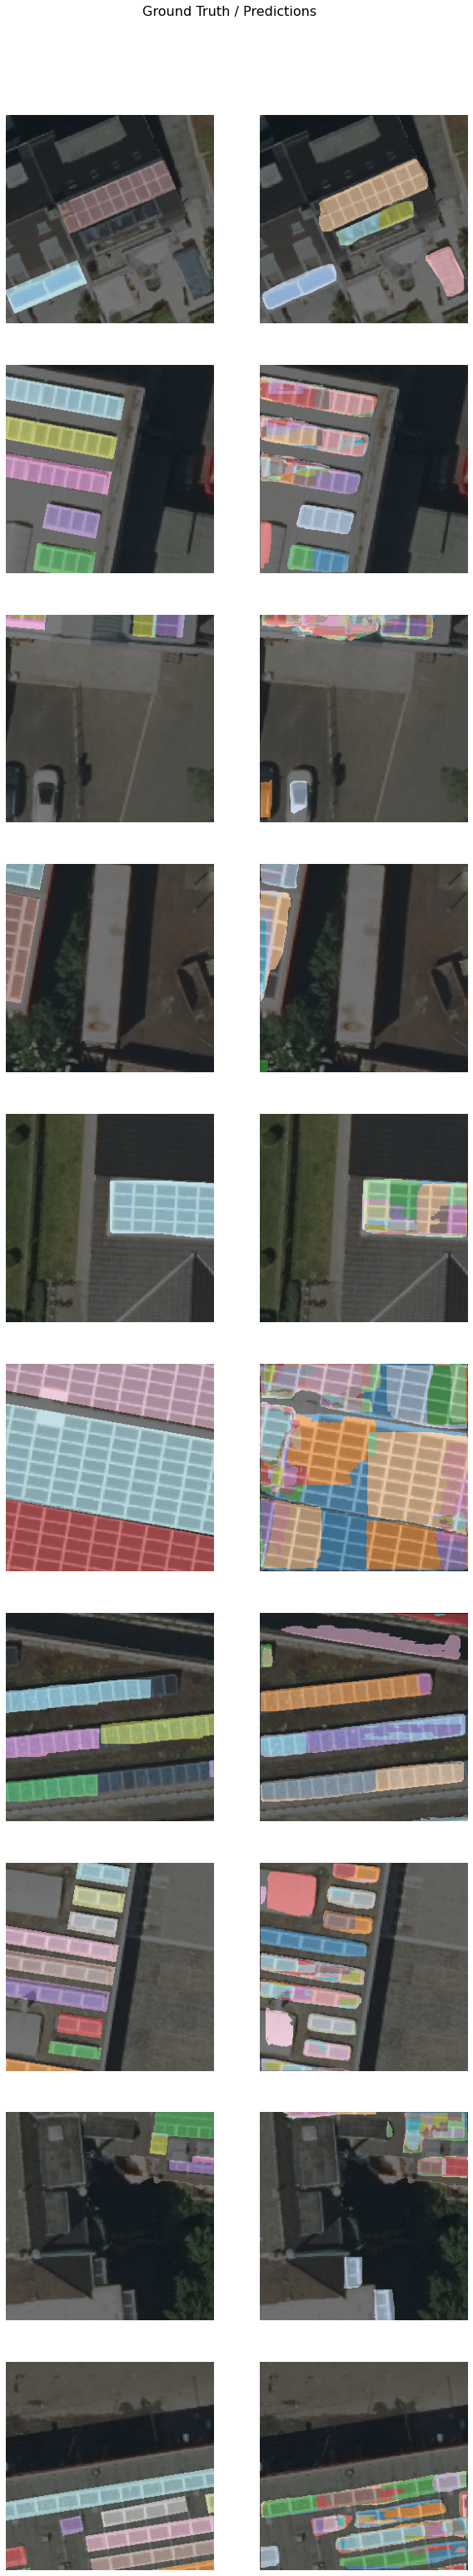

In [10]:
# Erneuter Check der Performance des Modells nach dem Training
model.show_results(10)

In [11]:
# Speichern des Modells als DLPK
model.save(r'C:\Users\bemu\Desktop\Webinar\Demo_Notebook\models\retrained_model_oncologne')

Computing model metrics...


WindowsPath('C:/Users/bemu/Desktop/Webinar/Demo_Notebook/models/retrained_model_oncologne')